#### Mutual Funds Bucket: Case Study  

Problem.  

The goal is to develop a Mutual Funds Investment Bucket that is optimized for long-term investments by balancing risk and returns. This involves selecting companies that provide consistent growth and moderate returns while minimizing exposure to volatility. Specifically, the objectives are:  

1. Stock Selection: Identify stocks with high ROI and low volatility, which will form the core of the mutual funds portfolio.  
2. Performance Evaluation: Use metrics such as volatility (standard deviation) and expected ROI to assess which stocks are  
   optimal for inclusion in the portfolio.  
3. Investment Strategy: Simulate the expected future value of investments based on monthly contributions over different time  
   horizons (e.g., 1 year, 3 years, 5 years, and 10 years).  
4. Risk-Reward Balance: Develop a strategy that ensures a balance between risk and reward, targeting long-term investors who  
   seek stable, compounded growth over several years.  
   
   
   
####  Data Dictionary  

•	Date: The date on which the stock price is recorded.  
•	Closing Price: The adjusted closing price for each stock on that particular date.  
•	Companies: A total of 50 top Indian companies are represented, covering a range of sectors like banking (HDFC Bank, ICICI Bank), technology (TCS, Infosys), consumer goods (Hindustan Unilever, ITC), automotive (Tata Motors, Bajaj Auto), and others.  


Source: Kaggle

#### We begin by bringing in necessary liabraries for the project

In [1]:
#initialize liabraris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Next is bring in the data set

In [2]:
# bring in the dataset for analysis
df = pd.read_csv(r'C:\Users\user\Desktop\nifty50_closing_prices.csv')

In [3]:
# view the top layers of the dataset
df.head()

,Date,RELIANCE.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,TCS.NS,KOTAKBANK.NS,HINDUNILVR.NS,ITC.NS,LT.NS,...,HEROMOTOCO.NS,DRREDDY.NS,SHREECEM.NS,BRITANNIA.NS,UPL.NS,EICHERMOT.NS,SBILIFE.NS,ADANIPORTS.NS,BAJAJ-AUTO.NS,HINDALCO.NS
0,2024-08-20 00:00:00+05:30,2991.899902,1637.699951,1179.449951,1872.199951,4523.299805,1805.650024,2751.050049,498.799988,3572.699951,...,5244.399902,6965.350098,24730.550781,5765.799805,566.150024,4883.250000,1761.300049,1492.550049,9779.700195,672.900024
1,2024-08-21 00:00:00+05:30,2997.350098,1625.800049,1174.849976,1872.699951,4551.500000,1812.949951,2791.199951,505.399994,3596.050049,...,5284.700195,7062.450195,24808.050781,5837.350098,568.299988,4913.549805,1800.599976,1503.500000,9852.000000,685.599976
2,2024-08-22 00:00:00+05:30,2996.250000,1631.300049,1191.099976,1880.250000,4502.000000,1821.500000,2792.800049,504.549988,3606.500000,...,5329.950195,6969.049805,25012.400391,5836.799805,579.150024,4933.549805,1795.250000,1492.300049,9914.200195,685.549988
3,2024-08-23 00:00:00+05:30,2999.949951,1625.050049,1203.500000,1862.099976,4463.899902,1818.000000,2815.600098,505.799988,3598.550049,...,5384.899902,6954.500000,24706.050781,5792.649902,573.700012,4898.100098,1789.300049,1491.300049,10406.450195,685.099976
4,2024-08-26 00:00:00+05:30,3025.199951,1639.949951,1213.300049,1876.150024,4502.450195,1812.500000,2821.149902,505.700012,3641.899902,...,5343.750000,6943.299805,24906.449219,5796.950195,577.450012,4875.200195,1796.250000,1482.550049,10432.549805,711.849976


In [4]:
# confirm the number rows & columns
df.shape

(24, 51)

In [5]:
# check the dataset general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           24 non-null     object 
 1   RELIANCE.NS    24 non-null     float64
 2   HDFCBANK.NS    24 non-null     float64
 3   ICICIBANK.NS   24 non-null     float64
 4   INFY.NS        24 non-null     float64
 5   TCS.NS         24 non-null     float64
 6   KOTAKBANK.NS   24 non-null     float64
 7   HINDUNILVR.NS  24 non-null     float64
 8   ITC.NS         24 non-null     float64
 9   LT.NS          24 non-null     float64
 10  SBIN.NS        24 non-null     float64
 11  BAJFINANCE.NS  24 non-null     float64
 12  BHARTIARTL.NS  24 non-null     float64
 13  HCLTECH.NS     24 non-null     float64
 14  ASIANPAINT.NS  24 non-null     float64
 15  AXISBANK.NS    24 non-null     float64
 16  DMART.NS       24 non-null     float64
 17  MARUTI.NS      24 non-null     float64
 18  ULTRACEMCO.N

#### Duplicate check

In [6]:
# duplicate check to see the sum
df.duplicated().sum()

0

#### Missing values check

In [7]:
# check the missing values in the data
df.isnull().sum()

Date              0
RELIANCE.NS       0
HDFCBANK.NS       0
ICICIBANK.NS      0
INFY.NS           0
TCS.NS            0
KOTAKBANK.NS      0
HINDUNILVR.NS     0
ITC.NS            0
LT.NS             0
SBIN.NS           0
BAJFINANCE.NS     0
BHARTIARTL.NS     0
HCLTECH.NS        0
ASIANPAINT.NS     0
AXISBANK.NS       0
DMART.NS          0
MARUTI.NS         0
ULTRACEMCO.NS     0
HDFC.NS          24
TITAN.NS          0
SUNPHARMA.NS      0
M&M.NS            0
NESTLEIND.NS      0
WIPRO.NS          0
ADANIGREEN.NS     0
TATASTEEL.NS      0
JSWSTEEL.NS       0
POWERGRID.NS      0
ONGC.NS           0
NTPC.NS           0
COALINDIA.NS      0
BPCL.NS           0
IOC.NS            0
TECHM.NS          0
INDUSINDBK.NS     0
DIVISLAB.NS       0
GRASIM.NS         0
CIPLA.NS          0
BAJAJFINSV.NS     0
TATAMOTORS.NS     0
HEROMOTOCO.NS     0
DRREDDY.NS        0
SHREECEM.NS       0
BRITANNIA.NS      0
UPL.NS            0
EICHERMOT.NS      0
SBILIFE.NS        0
ADANIPORTS.NS     0
BAJAJ-AUTO.NS     0


In [8]:
# display in percentage to know the columns to drop. by principle, any column having > 30% of NaN values is taken off.
pd.DataFrame(data = {"% of Missing Values": round(df.isnull().sum()/len(df)*100,3)}).sort_values(by = "% of Missing Values", ascending = False) 

,% of Missing Values
HDFC.NS,100.0
Date,0.0
TATASTEEL.NS,0.0
POWERGRID.NS,0.0
ONGC.NS,0.0
NTPC.NS,0.0
COALINDIA.NS,0.0
BPCL.NS,0.0
IOC.NS,0.0
TECHM.NS,0.0


#### Based on the percentage of null values  HDFC.NS is dropped.

In [9]:
# HDFC.NS dropped
df.drop('HDFC.NS', axis=1, inplace=True)

In [10]:
# confirm missing values in the data
df.isnull().sum()

Date             0
RELIANCE.NS      0
HDFCBANK.NS      0
ICICIBANK.NS     0
INFY.NS          0
TCS.NS           0
KOTAKBANK.NS     0
HINDUNILVR.NS    0
ITC.NS           0
LT.NS            0
SBIN.NS          0
BAJFINANCE.NS    0
BHARTIARTL.NS    0
HCLTECH.NS       0
ASIANPAINT.NS    0
AXISBANK.NS      0
DMART.NS         0
MARUTI.NS        0
ULTRACEMCO.NS    0
TITAN.NS         0
SUNPHARMA.NS     0
M&M.NS           0
NESTLEIND.NS     0
WIPRO.NS         0
ADANIGREEN.NS    0
TATASTEEL.NS     0
JSWSTEEL.NS      0
POWERGRID.NS     0
ONGC.NS          0
NTPC.NS          0
COALINDIA.NS     0
BPCL.NS          0
IOC.NS           0
TECHM.NS         0
INDUSINDBK.NS    0
DIVISLAB.NS      0
GRASIM.NS        0
CIPLA.NS         0
BAJAJFINSV.NS    0
TATAMOTORS.NS    0
HEROMOTOCO.NS    0
DRREDDY.NS       0
SHREECEM.NS      0
BRITANNIA.NS     0
UPL.NS           0
EICHERMOT.NS     0
SBILIFE.NS       0
ADANIPORTS.NS    0
BAJAJ-AUTO.NS    0
HINDALCO.NS      0
dtype: int64

#### A cursory look at the stock price trends of all the companies in the data:

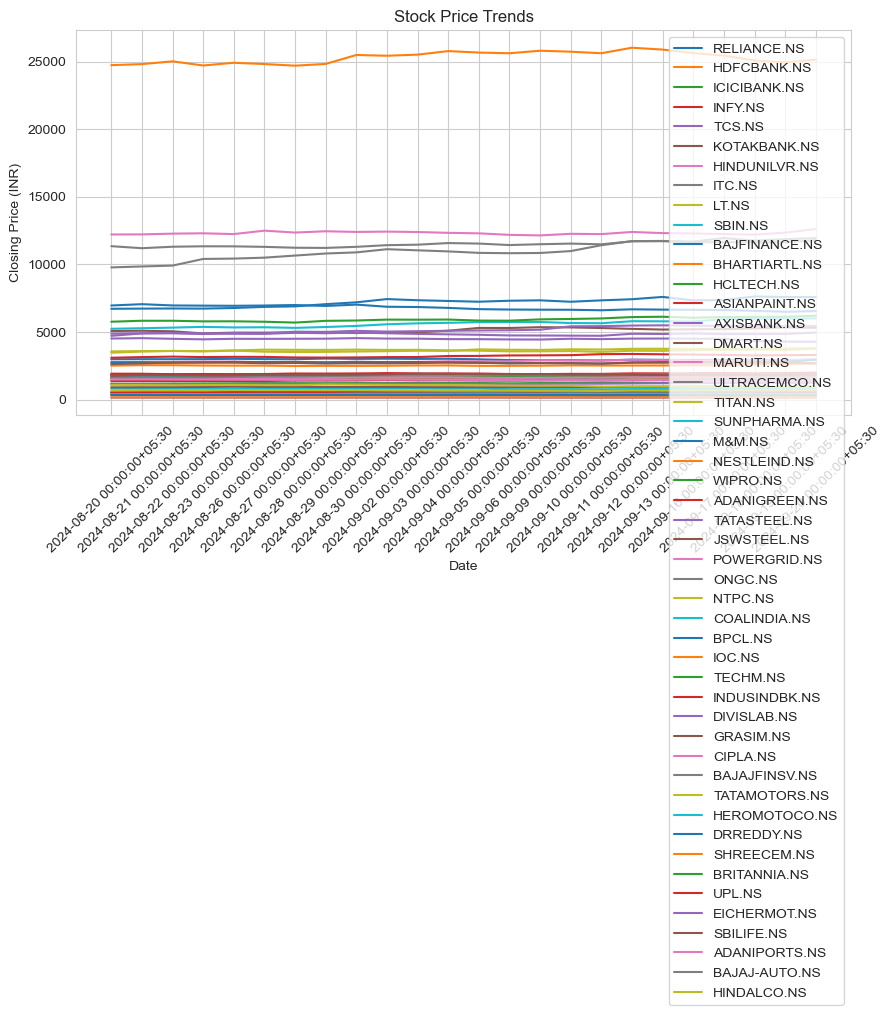

In [11]:
# Set the plot style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 5))

# Plot each company's stock trend
for company in df.columns[1:]:  # Skip 'Date' column
    sns.lineplot(x = df['Date'], y = df[company], label=company)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Closing Price (INR)")
plt.title("Stock Price Trends")
plt.xticks(rotation=45)  # Rotate dates for better visibility
plt.legend()  # Show legend

# Show the plot
plt.show()



#### Companies with the highest risks in investing

In [12]:
all_companies = df.columns[1:]

volatility_all_companies = df[all_companies].std()

volatility_all_companies.sort_values(ascending=False).head(10)


BAJAJ-AUTO.NS    659.810841
SHREECEM.NS      429.919834
BAJFINANCE.NS    306.658594
DIVISLAB.NS      247.674895
HEROMOTOCO.NS    247.092728
DRREDDY.NS       175.124908
ULTRACEMCO.NS    172.673053
DMART.NS         155.593701
BRITANNIA.NS     144.164343
MARUTI.NS        109.587342
dtype: float64

#### Companies with the highest growth rate in  investing

In [13]:
growth_all_companies = df[all_companies].pct_change().fillna(method='bfill') * 100

average_growth_all_companies = growth_all_companies.mean()

average_growth_all_companies.sort_values(ascending=False).head(10)

BAJAJ-AUTO.NS    0.877415
BAJAJFINSV.NS    0.807766
DIVISLAB.NS      0.765118
BHARTIARTL.NS    0.745701
HEROMOTOCO.NS    0.609119
BAJFINANCE.NS    0.522603
ICICIBANK.NS     0.518252
TITAN.NS         0.479912
HINDUNILVR.NS    0.397792
BRITANNIA.NS     0.365797
dtype: float64

#### Companies with the highest return on investments:

In [14]:
initial_prices_all = df[all_companies].iloc[0]
final_prices_all = df[all_companies].iloc[-1]

roi_all_companies = ((final_prices_all - initial_prices_all) / initial_prices_all) * 100

roi_all_companies.sort_values(ascending=False).head(10)

BAJAJ-AUTO.NS    22.107017
BAJAJFINSV.NS    19.642973
BHARTIARTL.NS    18.120965
DIVISLAB.NS      15.404976
HEROMOTOCO.NS    14.660402
ICICIBANK.NS     13.480860
BAJFINANCE.NS    12.797149
TITAN.NS          9.275089
HINDUNILVR.NS     8.235039
BRITANNIA.NS      7.713587
dtype: float64

#### Creating a Mutual Fund Plan Based on High ROI and Low Risk  

Here are the steps we can follow for creating a mutual fund plan:  
1.	Define ROI and Volatility Thresholds: We will set thresholds for ROI and volatility to select companies that provide good returns with lower risks.  
2. Rank Companies by ROI and Volatility: Rank all companies based on their ROI and volatility scores.  
3. Assign Investment Ratios: Allocate more investment to companies with higher ROI and lower volatility.

In [15]:
roi_threshold = roi_all_companies.median()
volatility_threshold = volatility_all_companies.median()

selected_companies = roi_all_companies[(roi_all_companies > roi_threshold) & (volatility_all_companies < volatility_threshold)]

selected_companies.sort_values(ascending=False)


ICICIBANK.NS     13.480860
INDUSINDBK.NS     7.159914
JSWSTEEL.NS       7.021748
AXISBANK.NS       6.592466
HDFCBANK.NS       6.319839
SUNPHARMA.NS      5.627425
KOTAKBANK.NS      5.474481
CIPLA.NS          4.850117
NTPC.NS           4.356926
dtype: float64

#### To balance the investment between these companies, we can use an inverse volatility ratio for allocation.  
Companies with lower volatility will get a higher weight. Let’s calculate the weight for each company:



In [16]:
selected_volatility = volatility_all_companies[selected_companies.index]
inverse_volatility = 1 / selected_volatility

investment_ratios = inverse_volatility / inverse_volatility.sum()

investment_ratios.sort_values(ascending=False)


NTPC.NS          0.280768
JSWSTEEL.NS      0.159985
AXISBANK.NS      0.092231
HDFCBANK.NS      0.089330
CIPLA.NS         0.084783
KOTAKBANK.NS     0.076642
INDUSINDBK.NS    0.074432
SUNPHARMA.NS     0.072553
ICICIBANK.NS     0.069276
dtype: float64

#### Calculating Expected Returns  

Next, calculate the expected value an investor will amass over a period of 1,3,5 and 10 years by investing 5,000 INR/month  
Visualize the investment trajectory

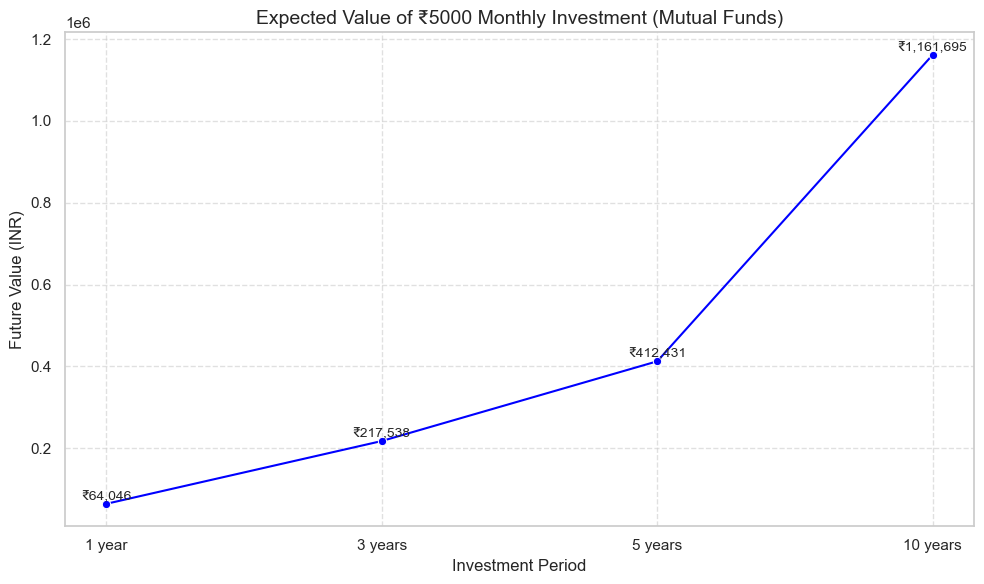

In [17]:
# Define monthly investment and expected return
monthly_investment = 5000  # in INR
years = [1, 3, 5, 10]       # Investment periods
n = 12                     # Compounded monthly

# Example: average ROI from mutual funds (in decimal)
avg_roi = 0.12  # i.e. 12% annual return

# Define future value function
def future_value(P, r, n, t):
    return P * (((1 + r/n)**(n*t) - 1) / (r/n)) * (1 + r/n)

# Calculate future values for each year
future_values = [future_value(monthly_investment, avg_roi, n, t) for t in years]

# Create human-readable investment period labels (with pluralization)
investment_periods = [f"{year} year{'s' if year > 1 else ''}" for year in years]

# Create DataFrame for plotting
df = pd.DataFrame({
    'Investment Period': investment_periods,
    'Future Value (INR)': future_values
})

# Plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Investment Period', y='Future Value (INR)', marker='o', color='blue')

# Annotate the points with values
for i, value in enumerate(future_values):
    plt.text(investment_periods[i], value + 10000, f"₹{int(value):,}", ha='center', fontsize=10)

# Labels and title
plt.title("Expected Value of ₹5000 Monthly Investment (Mutual Funds)", fontsize=14)
plt.xlabel("Investment Period", fontsize=12)
plt.ylabel("Future Value (INR)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Interpretation:  
There's a clear positive trajectory. As the years increase, the invested sum increases too.

#### Comparism and Visualization  

Mutual Fund vs.Top growth rate companies in terms of volatility (risk)  

Mutual Fund vs. High ROI companies.


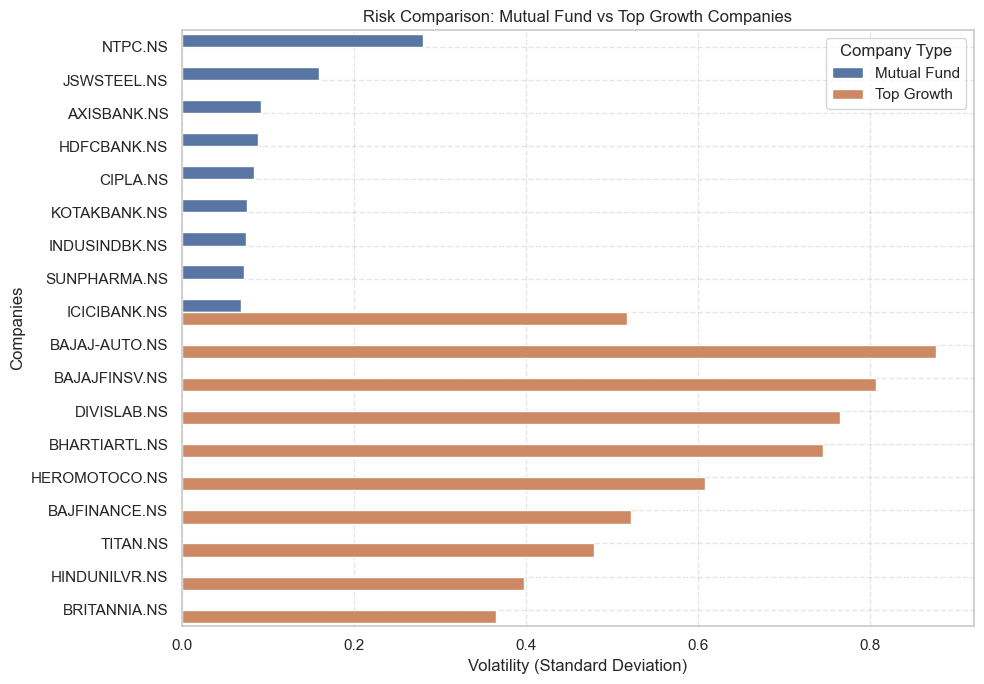

In [25]:
# Definition
risk_mutual_fund_companies = investment_ratios.sort_values(ascending=False).head(10)
risk_growth_rate_companies = average_growth_all_companies.sort_values(ascending=False).head(10)

# Create a combined DataFrame
df_risk = pd.DataFrame({
    'Company': list(risk_mutual_fund_companies.index) + list(risk_growth_rate_companies.index),
    'Volatility': list(risk_mutual_fund_companies.values) + list(risk_growth_rate_companies.values),
    'Type': ['Mutual Fund'] * len(risk_mutual_fund_companies) + ['Top Growth'] * len(risk_growth_rate_companies)
})

# Plot using seaborn
plt.figure(figsize=(10, 7))
sns.barplot(data=df_risk, y='Company', x='Volatility', hue='Type', dodge=True)

# Add labels and title
plt.title('Risk Comparison: Mutual Fund vs Top Growth Companies')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Companies')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Company Type')
plt.tight_layout()
plt.show()

#### Interpretation:  
The Mutul Fund exhibits less volatility compared to top growth companies

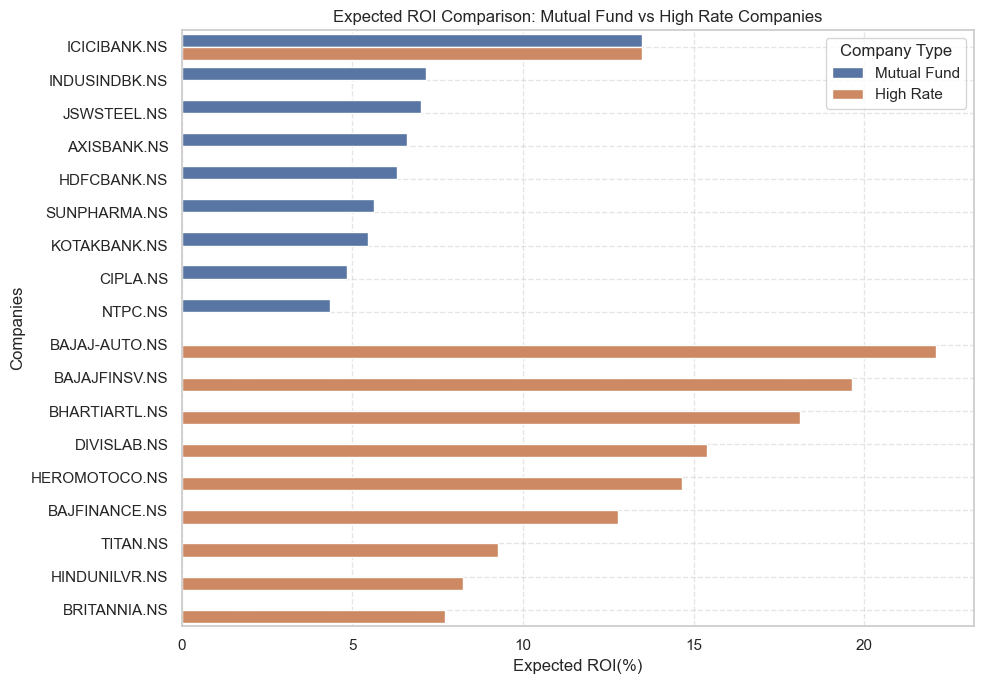

In [27]:
# Definition
expected_roi_mutual_fund_companies = selected_companies.sort_values(ascending=False).head(10)
expected_roi_high_rate_companies = roi_all_companies.sort_values(ascending=False).head(10)

# Create a combined DataFrame
df_risk = pd.DataFrame({
    'Company': list(expected_roi_mutual_fund_companies.index) + list(expected_roi_high_rate_companies.index),
    'Expected ROI': list(expected_roi_mutual_fund_companies.values) + list(expected_roi_high_rate_companies.values),
    'Type': ['Mutual Fund'] * len(expected_roi_mutual_fund_companies) + ['High Rate'] * len(expected_roi_high_rate_companies)
})

# Plot using seaborn
plt.figure(figsize=(10, 7))
sns.barplot(data=df_risk, y='Company', x='Expected ROI', hue='Type', dodge=True)

# Add labels and title
plt.title('Expected ROI Comparison: Mutual Fund vs High Rate Companies')
plt.xlabel('Expected ROI(%)')
plt.ylabel('Companies')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Company Type')
plt.tight_layout()
plt.show()

#### Interpretation:  
Clear trade off exists. High ROI does not neccessarily mean lower risk. Thus a balance must be struck

#### Summary:  
Mutual fund plan is designed by investment companies for long-term investors.  
It pools money from multiple investors to purchase a diversified portfolio of stocks, bonds, and other securities.  
Usually managed by professional fund managers.